<a href="https://colab.research.google.com/github/avellar1975/DataScience/blob/main/regressao_teste_carga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear para teste de carga do SAP BANKING

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [132]:
# variável preditora - contratos
x = np.array([x for x in range(200000, 5200000, 240000)])
             
# variável preditora - horas
y = np.array([ 0.15, 0.3, 0.45, 1, 1.2, 1.4, 1.7, 2.0, 2.4, 2.8, 3.2, 3.7, 4.2, 4.7, 5.3, 5.9, 6.6, 7.3, 8, 8.7, 9.4])

In [133]:
print(x)
print(len(x))
print(y)
print(len(y))

[ 200000  440000  680000  920000 1160000 1400000 1640000 1880000 2120000
 2360000 2600000 2840000 3080000 3320000 3560000 3800000 4040000 4280000
 4520000 4760000 5000000]
21
[0.15 0.3  0.45 1.   1.2  1.4  1.7  2.   2.4  2.8  3.2  3.7  4.2  4.7
 5.3  5.9  6.6  7.3  8.   8.7  9.4 ]
21


In [134]:
# Transformamos com o pandas esses dados em um DataFrame
df = pd.DataFrame(data=x, columns=['transacoes'])

# Juntamos ao DataFrame o target(y), nossa saida
df['horas'] = y
df.head()

,transacoes,horas
0,200000,0.15
1,440000,0.30
2,680000,0.45
3,920000,1.00
4,1160000,1.20


In [135]:
df.describe()

,transacoes,horas
count,2.100000e+01,21.000000
mean,2.600000e+06,3.828571
std,1.489161e+06,2.905580
min,2.000000e+05,0.150000
25%,1.400000e+06,1.400000
50%,2.600000e+06,3.200000
75%,3.800000e+06,5.900000
max,5.000000e+06,9.400000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   transacoes  21 non-null     int64  
 1   horas       21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [137]:
X = df[['transacoes']]
y = df.horas

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.25)

In [139]:
# Criando o modelo LinearRegression
regr = LinearRegression()

# Realizar treinamento do modelo
regr.fit(X_train, y_train)

# Realizar predição com os dados separados para teste
y_pred = regr.predict(X_test)

# Visualização dos 20 primeiros resultados
y_pred

array([6.67079016, 5.27590674, 1.09125648, 0.62629534, 3.41606218,
       2.02117876])

In [140]:
# Erro Médio Absoluto (Mean Absolute Error)
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

MAE: 0.34


In [141]:
# Erro Quadrado Médio (Mean Squared Error)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 0.16


In [142]:
print('R2 Score: %.2f' % r2_score(y_test, y_pred))

R2 Score: 0.96


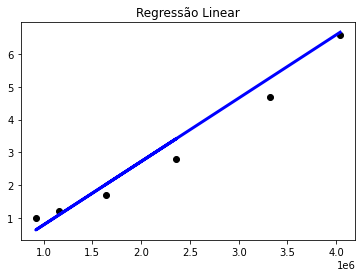

In [143]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Regressão Linear')
plt.show()

In [144]:
regr.predict([[15000000]])[0]


27.904015544041442

Autor: Evandro Avellar